Import the modules that will be used.

In [1]:
!pip install numba

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numba import jit

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

## Solution
These assume that indexing the array has time complexity $O(1)$
1. Dot product between two vectors:
   1. $x_iy_i$ has $O(1)$ time complexity, but since it is done $n$ times, the total time complexity is $O(n)$
2. Matrix-vector product:
   1. This is similar to before, but done n more time, for the extra dimension of the matrix, hence $O(n^2)$
3. Matrix-matrix product:
   1. Again, similar to before, but with an extra dimension, so $O(n^3)$
   1. Consider: $M = AB$ with $n$ elements. $M_{ij} = \sum_{k=1}^{n}{A_{ik}B_{kj}}$ which has a time complexity $O(n)$. This is repeated for each element in the matrix $n^2$, so the total time complexity is $O(n^3)$

## Testing implementations of products between vectors and matrices

In [2]:
# Vector dot vector
@jit
def vec_dot_vec(x,y):
    if x.shape != y.shape:
        print(x.shape)
        return None
    result = 0
    for i in range(len(x)):
        result += x[i] * y[i]
    return result

# Matrix dot vector
@jit
def mat_dot_vec(M,x):
    result = np.zeros(M.shape[0]) # number of elements in result should be the same number of rows as M
    if M.shape[1] != x.shape[0]:
        print(M.shape)
        print(x.shape)
        return None
    for i in range(M.shape[0]):
        result[i] = vec_dot_vec(M[i],x)
    return result

# Matrix dot Matrix
@jit
def mat_dot_mat(A,B):
    "Return A x B"
    if A.shape[0] != B.shape[1] or A.shape[1] != B.shape[0]:
        print(A.shape)
        print(B.shape)
        return None
    result = np.zeros_like(A,shape=(A.shape[1],B.shape[0])) # Result should have the same number of rows as A and cols as B
    #print(result)
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i][j] = vec_dot_vec(A[i], B[j])
    return result

        
# Test functions
a = np.random.rand(2)
b = np.random.rand(2)
print(a,b)
print(np.dot(a,b))
print(vec_dot_vec(a,b))

A = np.random.randint(1,5,(2,2)) # 6 rows, 5 columns. Must have same number of cols as a
print(A)
print(np.dot(A,a))
print(mat_dot_vec(A,a))

B = np.random.randint(1,5,(2,2))
print(B)
print(np.dot(A,B))
print(mat_dot_mat(A,B))

[0.48085063 0.04232235] [0.78320868 0.28947891]
0.3888578111762268
0.3888578111762268
[[1 4]
 [4 3]]
[0.65014004 2.05036956]
[0.65014004 2.05036956]
[[4 3]
 [3 1]]
[[16  7]
 [25 15]]
[[16  7]
 [25 15]]


In [3]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 8, 0.5)
N = np.int64(N)
print(N)
 
# Create 2 vectors
#a = np.random.rand(N[-1])
#b = np.random.rand(N[-1])

#Create 2 matrices
A = np.random.rand(N[-1], N[-1])
B = np.random.rand(N[-1], N[-1])

# Time the different implementations
our_times = []
np_times = []
for n in N:
    # Time our mat_mat implememtation
    t = %timeit -n3 -q -o mat_dot_mat(A[:n-1,:n-1], B[:n-1,:n-1])
    our_times.append(t.best)
    
    # Time numpy built-in
    t = %timeit -n3 -q -o np.dot(A[:n-1,:n-1],B[:n-1,:n-1])
    np_times.append(t.best)

[  4   5   8  11  16  22  32  45  64  90 128 181]


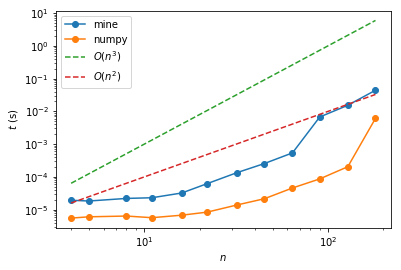

In [4]:
#print(our_times)
#Plot our times
plt.loglog(N, our_times, marker='o', label='mine')

#Plot numpy implementation time
plt.loglog(N, np_times, marker='o', label='numpy')

#Plot reference line of O(n^3)
plt.loglog(N, 1e-6*N**3, '--', label=r'$O(n^3$)')
#Plot reference line of O(n^2)
plt.loglog(N, 1e-6*N**2, '--', label=r'$O(n^2$)')

# Show legend
plt.legend(loc=0);

# Add label and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

plt.show()

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [2]:
@jit
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n
factorial(3) # Run once to compile program

6

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

In [3]:
# Create array of problem sizes we want to test (powers of 2)
N_factorial = np.arange(0, 20)
#print(N)

#Set max recursion loop
import sys
sys.setrecursionlimit(2500)

# Time implementation of factorial
times_factorial=[]
for n in N_factorial:
    # Time our quicksort implememtation
    t = %timeit -r3 -q -o factorial(n)
    times_factorial.append(t.best)
#print(times)

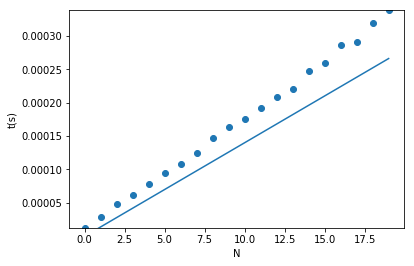

In [4]:
#Plot times on graph
plt.scatter(N_factorial, times_factorial, label='factorial')
plt.ylim(min(times_factorial), max(times_factorial))
plt.plot(N_factorial, 1.4e-5*N_factorial, label=r'$O(n)$')
plt.xlabel('N')
plt.ylabel('t(s)')
plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [8]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [9]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [32]:
# Create array of problem sizes we want to test (powers of 2)
N_det = 2**np.arange(2, 12)

# Create a square matrix of the max size
#X = np.random.rand(N[-1], N[-1])

@jit
def random_det(n):
    "Create a random matrix and calculate the determinant"
    # n is the size of the matrix
    X = np.random.rand(n,n)
    np.linalg.slogdet(X)

random_det(5)
    
#time the determinant for all sizes repeated 3 times
times_det = []
for n in N_det:
    X = np.random.rand(n, n)
    t = %timeit -n5 -q -o random_det(n-1)
    times_det.append(t.best)
print(times_det)

[1.3999999282532371e-06, 1.9799999790848233e-06, 5.8200000239594376e-06, 2.5519999962853034e-05, 8.585999994465965e-05, 0.006220020000000659, 0.021248779999950784, 0.12866209999992861, 0.40791455999997195, 1.4061270199999854]


Plot result:

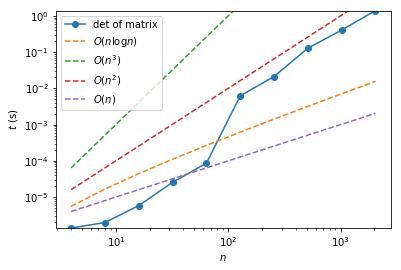

In [33]:
# Plot determinant timings
plt.loglog(N_det, times_det, marker='o', label='det of matrix')

# Plot nlog(n) line for reference
plt.loglog(N_det, 1e-6*N_det*np.log(N), '--', label=r'$O(n\log n)$')

# Show reference line of O(n^3)
plt.loglog(N_det, 1e-6*N_det**3, '--', label=r'$O(n^3$)')

# Show reference line of O(n^2)
plt.loglog(N_det, 1e-6*N_det**2, '--', label=r'$O(n^2$)')

# Show reference line of O(n)
plt.loglog(N_det, 1e-6*N_det**1, '--', label=r'$O(n$)')

# Add labels
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)

plt.ylim(min(times_det), max(times_det))

plt.show()